In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv("/Users/dhruvpai/Downloads/practicals/datasets/Wine.csv")

In [28]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [29]:
# Separate features and labels
X = data.iloc[:, 1:]  # Assuming first column is the label
y = data.iloc[:, 0]

In [30]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

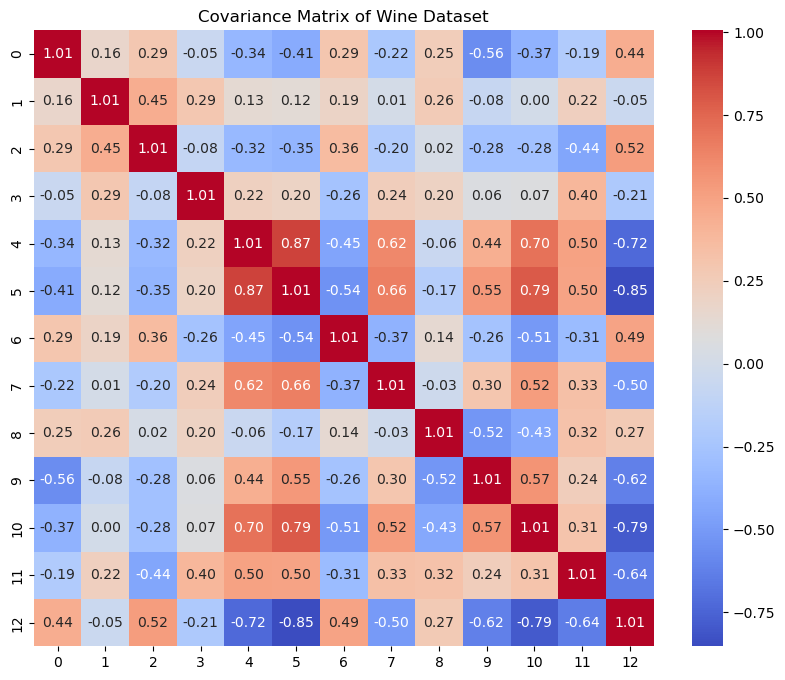

In [31]:
# Covariance Matrix Computation
cov_matrix = np.cov(X_scaled, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Covariance Matrix of Wine Dataset")
plt.show()

In [32]:
# Apply PCA
pca = PCA(n_components=2)  # Keeping 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

In [33]:
# Create a DataFrame with principal components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Wine_Type'] = y

In [34]:
# Display the transformed data
print(pca_df.head())

        PC1       PC2  Wine_Type
0 -3.310490 -1.205312      14.23
1 -2.512443  0.667054      13.20
2 -2.742308 -1.498118      13.16
3 -3.635403 -2.539204      14.37
4 -1.359658 -1.336899      13.24


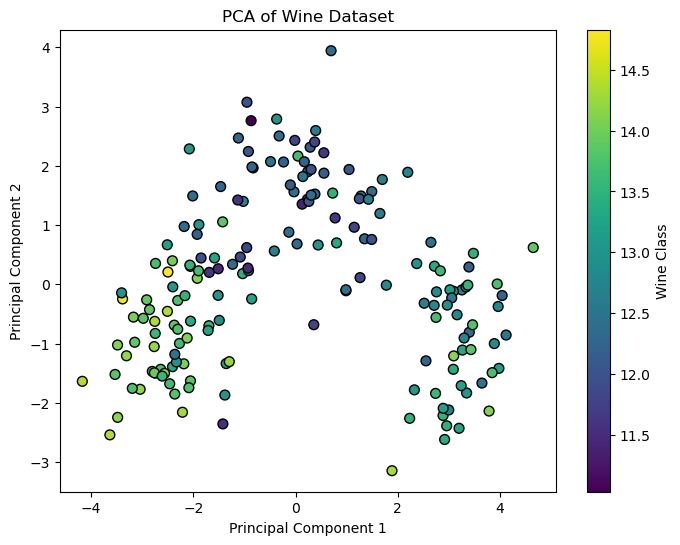

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.colorbar(label='Wine Class')
plt.show()

Theory:
PCA is an unsupervised linear dimensionality reduction algorithm to find a more meaningful basis
or coordinate system for our data and works based on covariance matrix to find the strongest
features of your samples.
PCA is used for -
1. Dimensionality Reduction
2. Increasing Performance
3. Visualizing Higher Dimensional Data
4. Obscure Data
5. Create Independent Features

In PCA, the principal components represent the new dimensions or features created by transforming the original dataset. Principal Component 1 (PC1) and Principal Component 2 (PC2) capture the directions in which the variance of the dataset is maximized, thus simplifying the dataset while retaining the most information possible.

For this wine dataset:

PC1 is the primary axis along which the data varies the most, combining multiple original features.
PC2 is the secondary axis, capturing the next highest variance, orthogonal to PC1.
These components help to visualize and distinguish wine types based on the highest variance in feature combinations.